In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("mnist")
trained_dataset=dataset["train"]

data_array=[[] for i in range (10)]

C:\Users\rushi\AppData\Roaming\Python\Python312\site-packages\datasets\load.py:1454: FutureWarning: The repository for mnist contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mnist
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [3]:
for data in trained_dataset:
    data_image = data["image"]
    data_label = data["label"]
    if len(data_array[data_label])<100 :
        data_array[data_label].append(np.array(data_image).flatten())  #adds 100 images from each class 0 to 9 of mnist trained data set to data_array

In [4]:
data_nparray =np.array(data_array)   # converts the data_array(which is list of lists) into numpy array
X =np.zeros((1000,784))              # creates a 2D numpy array X  with 1000 rows and 784 couloumns intailised to 0
for i in range(10) :
  for j in range(100) :
     X[100*i+j] =data_nparray[i,j]  



                                      #each row  becomes a datapoint(corresponds an image) of  X.(X is a 1000 X 784 matrix)
X = X.transpose()                    # each coloumn of X is a datapoint.(X is a 784 X 1000 matrix))

In [5]:

data_mean = np.mean(X,axis=1)                      #calculate the mean of the datapoints which is a coloumnvector
print(data_mean.shape)
X = X -data_mean[:,np.newaxis]                     #subtracts mean from each coloumn (centering the data)
C=  np.dot(X,X.T)/1000  
C= C + 1e-8*np.eye(784)                            # C is now the covarince matrix                           
C_eigenvalues,C_eigen_vectors = np.linalg.eigh(C)  
C_eigenvalues = C_eigenvalues[::-1]                # eigen values in decreasing order
C_eigen_vectors = C_eigen_vectors[:,::-1]          # rearrange the eigen vectors according to the eigen values

(784,)


# IMAGES OF PC

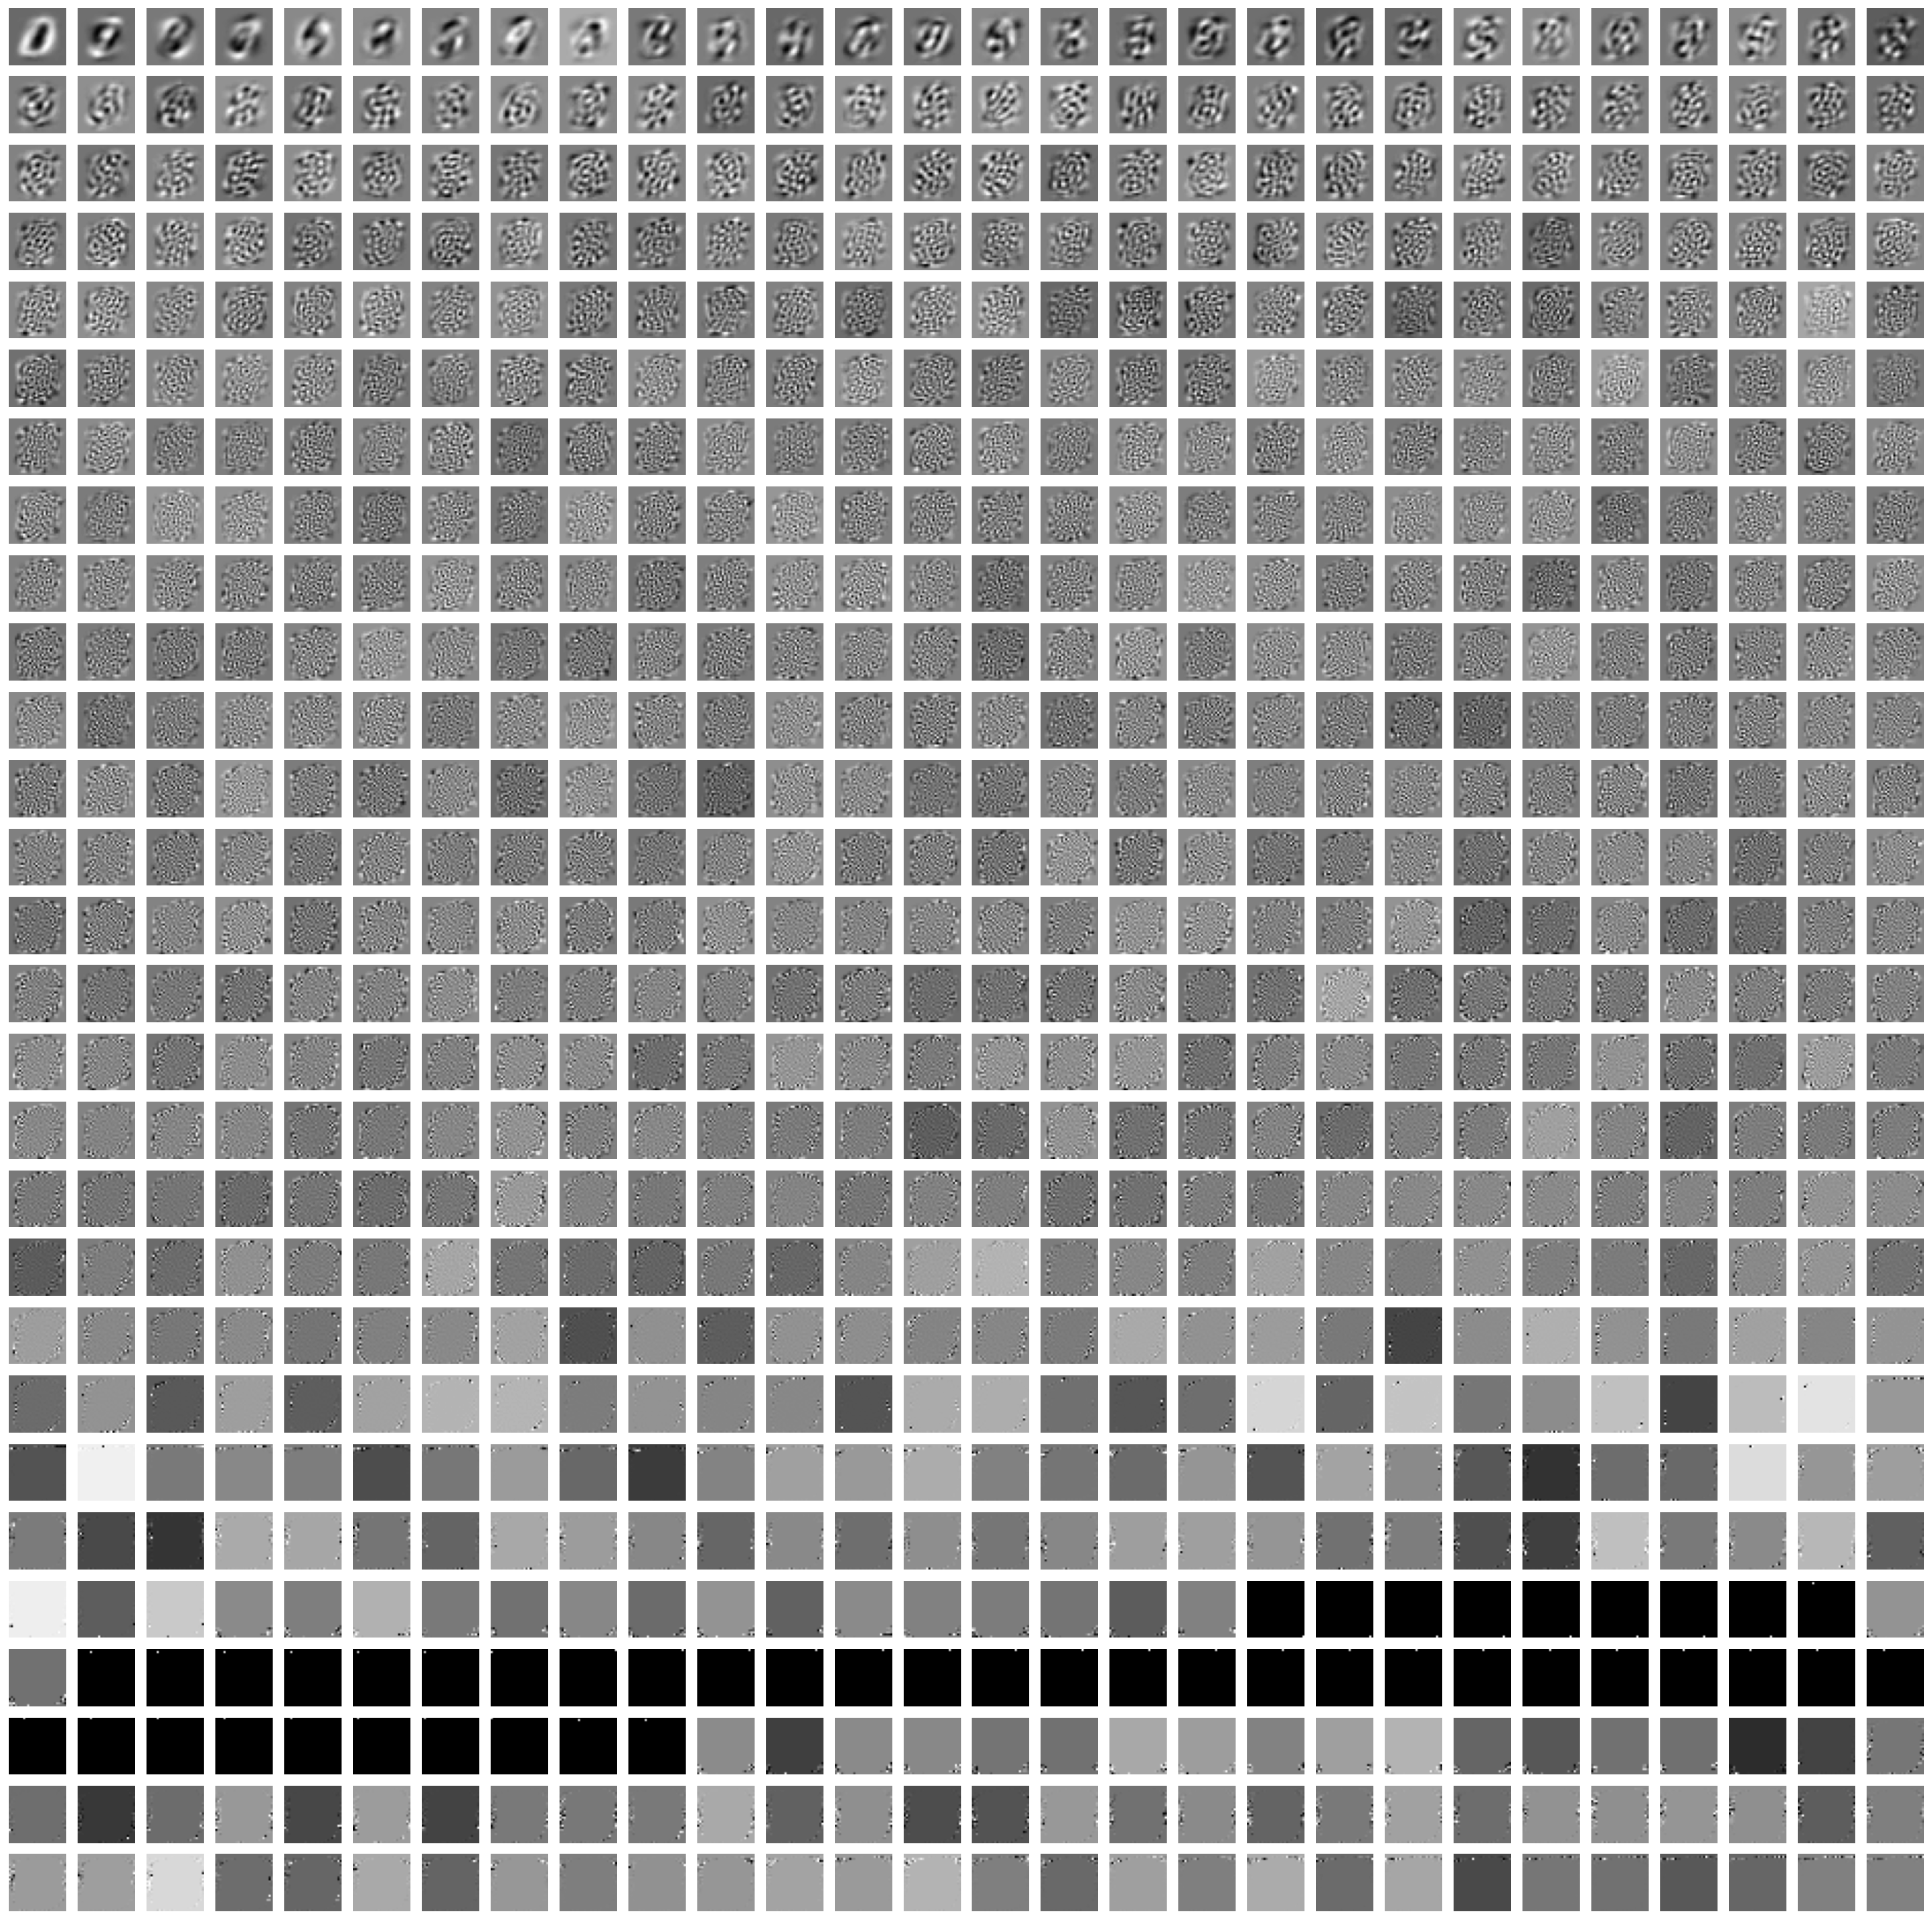

In [6]:
fig ,axs = plt.subplots(28,28,figsize=(28,28))
for i in range(784) :
  axs[int(i/28),i%28].imshow(C_eigen_vectors[:,i].reshape(28,28),cmap="gray")
  axs[int(i/28),i%28].axis("off")

plt.show()  

In [7]:
eigenvalues_totalsum =0 #intialised to zero
K=0                     
eigen_sum=[0   for i in range(784)]  # creates list of length 784 each element is 0.
for i in range (len(C_eigenvalues) ):
    eigenvalues_totalsum+=C_eigenvalues[i]
                                             
for j in range (len(C_eigenvalues) ):
    for k in range(j) :
        eigen_sum[j]+=C_eigenvalues[k]
    eigen_sum[j] = eigen_sum[j]*100/ (eigenvalues_totalsum)

for i in range(len(C_eigenvalues)) :
    if eigen_sum[i]>=95 :
        K=i
        break

# VARIANCE EXPLAINED BY EACH PC

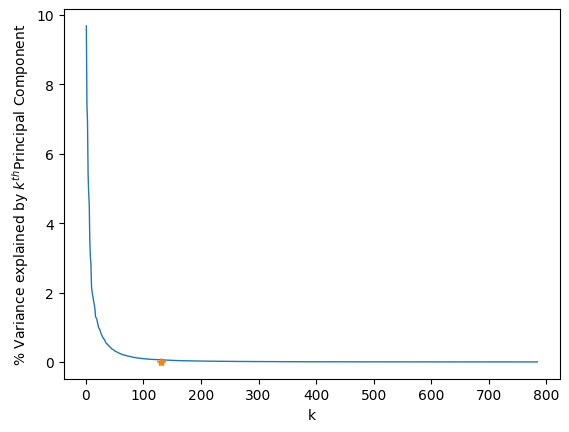

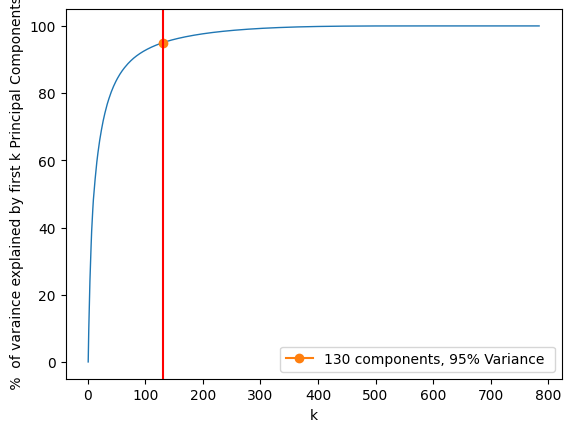

In [8]:
x= np.arange(1,len(C_eigenvalues)+1)


plt.plot(x,100*C_eigenvalues/eigenvalues_totalsum,linewidth=1)
plt.plot(K+1,C_eigenvalues[K]/eigenvalues_totalsum,marker='*')
plt.annotate(f'{K} features', xy=(x[K + 1], C_eigenvalues[K]),xytext=(20,10), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
plt.xlabel("k")
plt.ylabel(r"% Variance explained by $k^{th}$Principal Component")
plt.show()

plt.plot(x,eigen_sum,linewidth=1)
plt.plot(x[K],eigen_sum[K],marker='o',label="130 components, 95% Variance ")
plt.axvline(x=K+1,color="r",linestyle='-')
plt.xlabel("k")
plt.ylabel(" %  of varaince explained by first k Principal Components")
plt.legend()
plt.show()


In [9]:

Coefficients = np.matmul(X.T,C_eigen_vectors)
Coefficients_after_PCA=np.matmul(X.T,C_eigen_vectors[:,:k])
Representatives = C_eigen_vectors[:,:K]


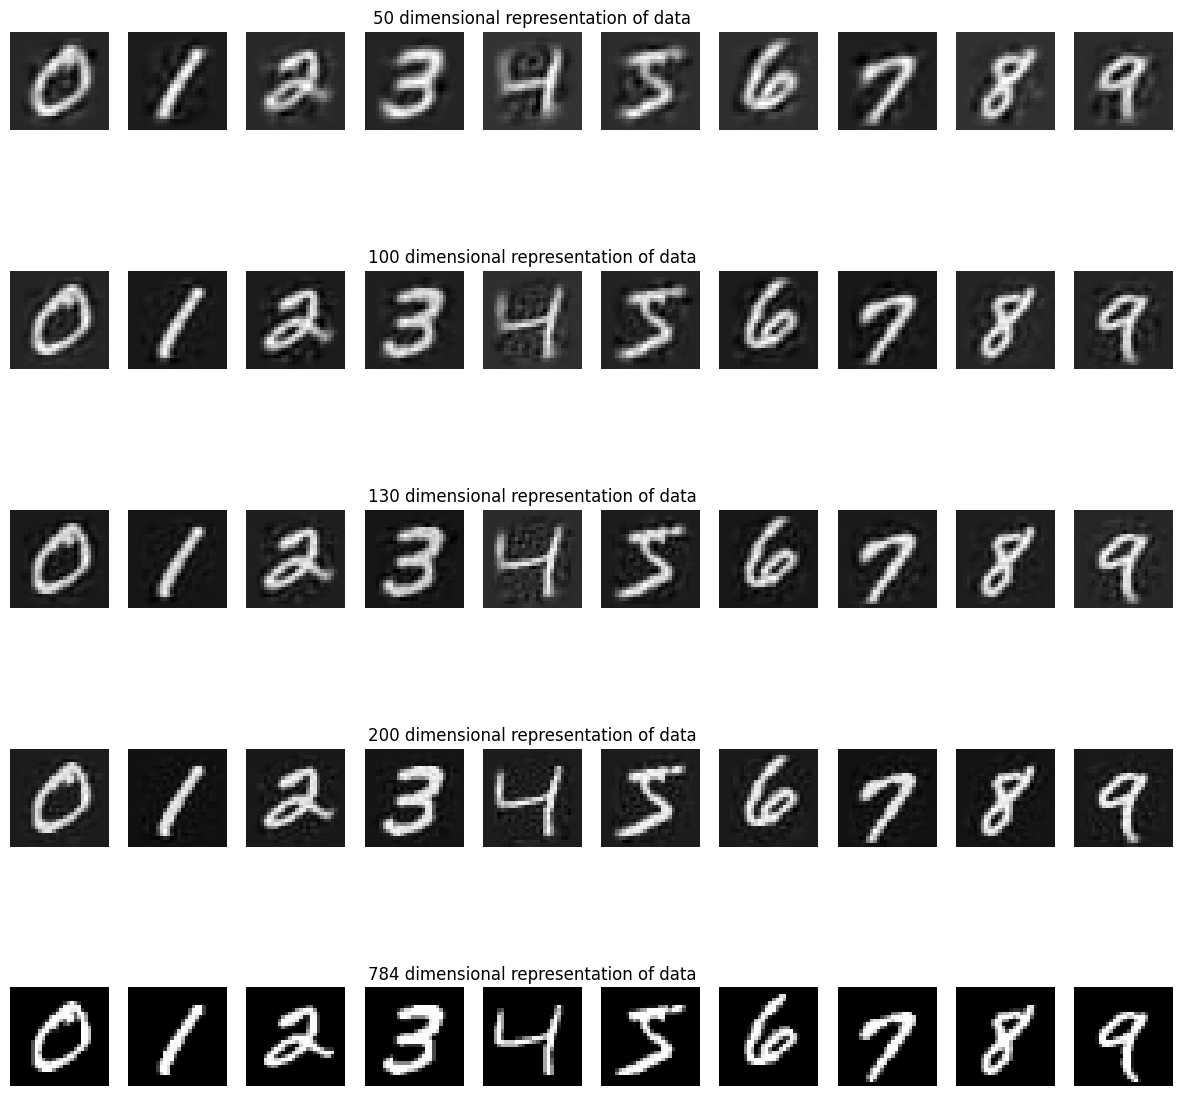

In [10]:
L=[50,100,130,200,784]
fig,axs=plt.subplots(5,10,figsize=(15,15))
b=0
for l in L :
  
  
  for i in range(10) :
  
      reconstructed_image =np.zeros((784))
      for a in range (l):
          reconstructed_image+=np.dot(np.dot((X[:,100*i].T),C_eigen_vectors[:,a]),C_eigen_vectors[:,a])
      reconstructed_image+=data_mean    
      axs[b,i].imshow(reconstructed_image.reshape(28,28),cmap="gray")
      axs[b,i].axis("off")
  axs[b,4].set_title(str(l)+" dimensional representation of data")
  b+=1    
plt.show()      